In [1]:
%matplotlib inline
from sympy import *
init_printing()
x, x0, a, b, c, t, L, F, D, T, t0= symbols('x x0 a b c t L F D T tau_0')
sigma, mu, xi = symbols('sigma mu xi')
k, m, n, i, j = symbols('k_B m n i j', integer=True)
f, g, h, p, q = symbols('f g h p q', cls=Function)

# Relaxation time

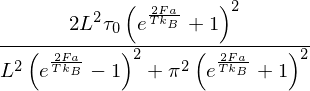

In [2]:
alpha = 1/(t0*(1+exp(-2*F*a/(k*T))))
beta = exp(-2*F*a/(k*T))/(t0*(1+exp(-2*F*a/(k*T))))
mu = beta - alpha
D = (alpha + beta)/2
lam = mu*mu/(4*D) + D * pi * pi/(L*L)
tau = 1/lam
tau0 = L*L/(D*pi*pi)
#simplify(tau0) + simplify(tau - tau0)
simplify(tau)

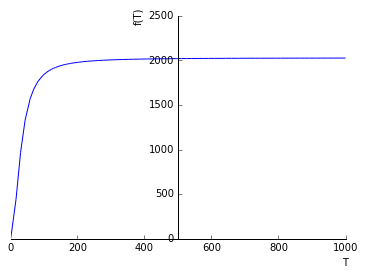

In [3]:
plot(tau.subs({L:100, t0:1, F:1, k:1, a:1}), (T, 1, 1000))

In [4]:
t0 = 2*a*a*xi/(12*k*T)
alpha = 1/(t0*(1+exp(-2*F*a/(k*T))))
beta = exp(-2*F*a/(k*T))/(t0*(1+exp(-2*F*a/(k*T))))
mu = alpha - beta
D = (alpha + beta)/2
lam = mu*mu/(4*D) + D * pi * pi/(L*L)
tau = 1/lam
tau0 = L*L/(D*pi*pi)
print simplify(tau0) + simplify(tau - tau0)

-L**4*a**2*xi*(exp(2*F*a/(T*k_B)) - 1)**2/(3*pi**2*T*k_B*(L**2*(exp(2*F*a/(T*k_B)) - 1)**2 + pi**2*(exp(2*F*a/(T*k_B)) + 1)**2)) + L**2*a**2*xi/(3*pi**2*T*k_B)


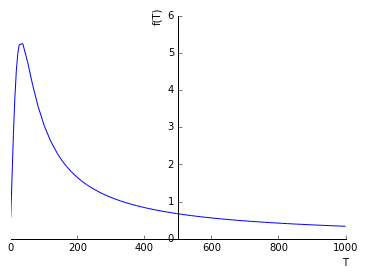

In [5]:
plot(tau.subs({L:100, F:1, k:1, a:1, c: 1./12, xi:1}), (T, 1, 1000))

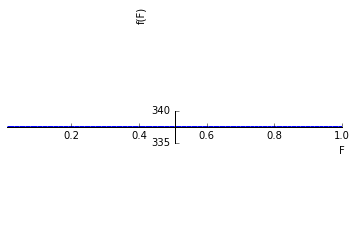

In [6]:
plot(tau0.subs({L:100, T:1, k:1, a:1, c: 1./12, xi:1}), (F, 0.01, 1))

# Mean and variance of bead position

In [2]:
t0 = 2*a*a*xi/(12*k*T)
alpha = 1/(t0*(1+exp(-2*F*a/(k*T))))
beta = exp(-2*F*a/(k*T))/(t0*(1+exp(-2*F*a/(k*T))))
mu = beta - alpha
D = (alpha + beta)/2

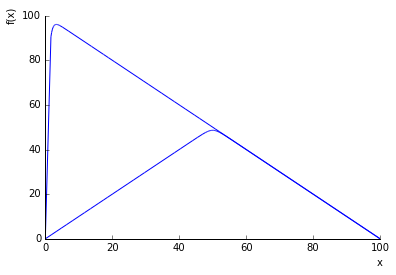

In [15]:
mean = L*a*(exp(mu/D * x ) - 1) / (exp(mu/D *L) -1) - x*a
mean_z = 2*T*a*log((1+exp(L/(2*T)))/(exp(x/(2*T))+exp((L-x)/(2*T))))
plot(mean_z.subs({L:100,T:1, a:1}),
     mean.subs({L:100, F:1, a:1, T:1, k:1, xi:1}), 
     (x, 0, 100))
#f.subs({L:100, F:1, a:1, T:10, k:1, xi:1})

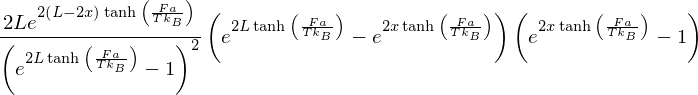

In [9]:
var = 2 * L *(exp(mu/D * L) - exp(mu/D * x)) * (exp(mu/D * x) - 1)/ ((exp(mu/D *L) - 1)**2)
simplify(var)

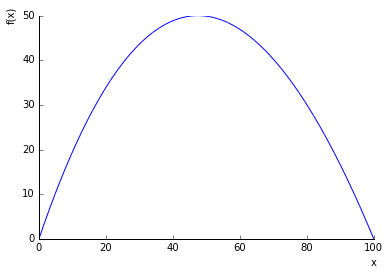

In [10]:
plot(var.subs({L:100, F:1, a:1, T:1000, k:1, xi:1}), (x, 0, 100))

In [3]:
mu_0, D_0 = symbols('mu_0 D_0')
f = x + n * (exp(mu_0/D_0 * x) - 1)/(exp(mu_0*L/D_0)-1) - j + 1
x1 = solve(f, x)[0]
f = x + n * (exp(mu_0/D_0 * x) - 1)/(exp(mu_0*L/D_0)-1) - j 
x2 = solve(f, x)[0]
p_j = 1 - (x2 - x1)
val_mu = mu.subs({L:50, n:50, F:1, a:1, T:10, k:1, xi:1}).evalf()
val_D = D.subs({L:50, n:50, F:1, a:1, T:10, k:1, xi:1}).evalf()
p_j = p_j.subs({mu_0:val_mu, D_0:val_D, n:50, L:50})

q = 1/(1+exp((F*a*(j-(L+1)/2))/(k*T)))
fermi = q.subs({L:100, F:1, a:1, T:10, k:1})

# import mpmath as mp
# q = sqrt(beta/alpha).subs({F:1, a:1, k:1, T:10})
# qfac = (mp.qfac(L, q)/(mp.qfac(L-x, q)*mp.qfac(x, q))).subs({L:100, x:10})

# # plot(p_j, fermi, (j, 0, 100))

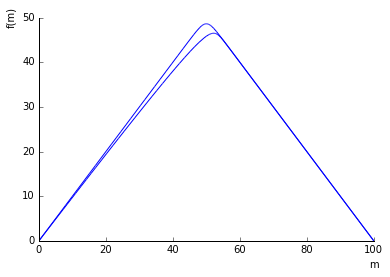

In [5]:
mu_0, D_0 = symbols('mu_0 D_0')
f = x + n * (exp(mu_0/D_0 * x) - 1)/(exp(mu_0*L/D_0)-1) - m
x0 = solve(f, x)[0]
mean = a*(m - 2*x0)
mean_z = 2*T*a*log((1+exp(n/(2*T)))/(exp(m/(2*T))+exp((n-m)/(2*T))))
val_mu = mu.subs({L:100, n:50, F:1, a:1, T:1, k:1, xi:1}).evalf()
val_D = D.subs({L:100, n:50, F:1, a:1, T:1, k:1, xi:1}).evalf()
plot(
    mean.subs({mu_0:val_mu, D_0:val_D, n:50, L:100, a:1}),
    mean_z.subs({n:100, T:1, a:1}),
     (m, 0, 100))

In [27]:
f = x + n * (exp(a * x) - 1)/(exp(a*L)-1) - m
x0 = solve(f, x)[0]

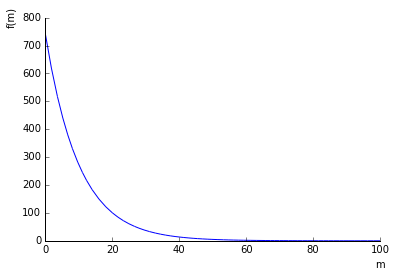

In [16]:
# plot(x0.subs({L:100, n:50, a:-100}), (m, 0, 100))
a0 = a*n*exp(a*(m*exp(L*a) - m + n)/(exp(L*a) - 1))/(exp(L*a) - 1)
plot(a0.subs({a:-0.1, n:50, L:100}), (m, 0, 100))                                                    

In [32]:
x0
dm = diff(x0, m)

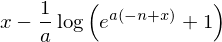

In [7]:
f = 1 / (1 + exp(a*(x - n)))
integrate(f, x)